In [6]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = "Arial"


csv = pd.read_csv('for_figure.csv')
available_data = csv.dropna() # Remove sites that have missing data
print(len(csv), len(available_data))

99 98


In [7]:
calc_completed = available_data['status'] == 'ok'
available_data = available_data[calc_completed]
print(len(available_data))
available_data

83


,Unnamed: 0,space_group,combinations,facets,coverage,active_site,binding_site,G(OH),G(O),G(OOH),overpotential,status
0,0,136_rutile,Co_Ir,[001],0,0,Ir,1.24,3.50,4.92,1.03,ok
1,1,136_rutile,Co_Ir,[001],1,0,Co,1.84,3.81,4.80,0.74,ok
2,2,136_rutile,Co_Ir,[100],0,0,Ir,0.65,2.00,3.62,0.39,ok
3,3,136_rutile,Co_Ir,[100],1,0,Co,1.74,3.59,4.76,0.62,ok
4,4,136_rutile,Co_Ir,[101],0,0,Co,1.62,3.85,4.85,1.00,ok
5,5,136_rutile,Co_Ir,[101],0,1,Ir,0.65,2.33,3.94,0.45,ok
6,6,136_rutile,Co_Ir,[110],0,0,Ir,0.61,1.96,3.62,0.43,ok
7,7,136_rutile,Fe_Ir,[001],0,0,Ir,1.04,2.31,4.13,0.59,ok
8,8,136_rutile,Fe_Ir,[001],1,0,Fe,1.45,3.82,4.46,1.14,ok
9,9,136_rutile,Fe_Ir,[100],0,0,Ir,0.42,1.86,3.52,0.43,ok


In [8]:
binding_site = list(set([i for i in available_data['binding_site']]))
binding_site

['Rh', 'Ir', 'Co', 'Pd', 'Ti', 'Mo', 'Fe', 'Tc', 'Pt']

# Group data based on active sites

In [9]:
Ir_mask = (available_data['binding_site'] == 'Ir')
Tc_mask = (available_data['binding_site'] == 'Tc')
Ti_mask = (available_data['binding_site'] == 'Ti')
Pd_mask = (available_data['binding_site'] == 'Pd')
Pt_mask = (available_data['binding_site'] == 'Pt')
Co_mask = (available_data['binding_site'] == 'Co')
Rh_mask = (available_data['binding_site'] == 'Rh')
Mo_mask = (available_data['binding_site'] == 'Mo')
Fe_mask = (available_data['binding_site'] == 'Fe')

Ir = available_data[Ir_mask]
Tc = available_data[Tc_mask]
Ti = available_data[Ti_mask]
Pd = available_data[Pd_mask]
Pt = available_data[Pt_mask]
Co = available_data[Co_mask]
Rh = available_data[Rh_mask]
Mo = available_data[Mo_mask]
Fe = available_data[Fe_mask]

In [10]:
G_O = Ir['G(O)'].tolist()+Tc['G(O)'].tolist()+Ti['G(O)'].tolist()+Pd['G(O)'].tolist()+Pt['G(O)'].tolist()+Co['G(O)'].tolist()+Rh['G(O)'].tolist()+Mo['G(O)'].tolist()+Fe['G(O)'].tolist()
G_OH = Ir['G(OH)'].tolist()+Tc['G(OH)'].tolist()+Ti['G(OH)'].tolist()+Pd['G(OH)'].tolist()+Pt['G(OH)'].tolist()+Co['G(OH)'].tolist()+Rh['G(OH)'].tolist()+Mo['G(OH)'].tolist()+Fe['G(OH)'].tolist()
G_OOH = Ir['G(OOH)'].tolist()+Tc['G(OOH)'].tolist()+Ti['G(OOH)'].tolist()+Pd['G(OOH)'].tolist()+Pt['G(OOH)'].tolist()+Co['G(OOH)'].tolist()+Rh['G(OOH)'].tolist()+Mo['G(OOH)'].tolist()+Fe['G(OOH)'].tolist()
binding_sites = Ir['binding_site'].tolist()+Tc['binding_site'].tolist()+Ti['binding_site'].tolist()+Pd['binding_site'].tolist()+Pt['binding_site'].tolist()+Co['binding_site'].tolist()+Rh['binding_site'].tolist()+Mo['binding_site'].tolist()+Fe['binding_site'].tolist()


# Scaling relations

[1.47358505 1.39534584]
[0.92064404 3.18825992]
0.9206440363890168 3.1882599178578674 0.8605431766345816 1.9054178439750042e-25 0.06055030430772912
1.4735850532686268 1.3953458363282136 0.8520800086995323 1.738728356741327e-24 0.10057629439036911


<Figure size 500x309.017 with 0 Axes>

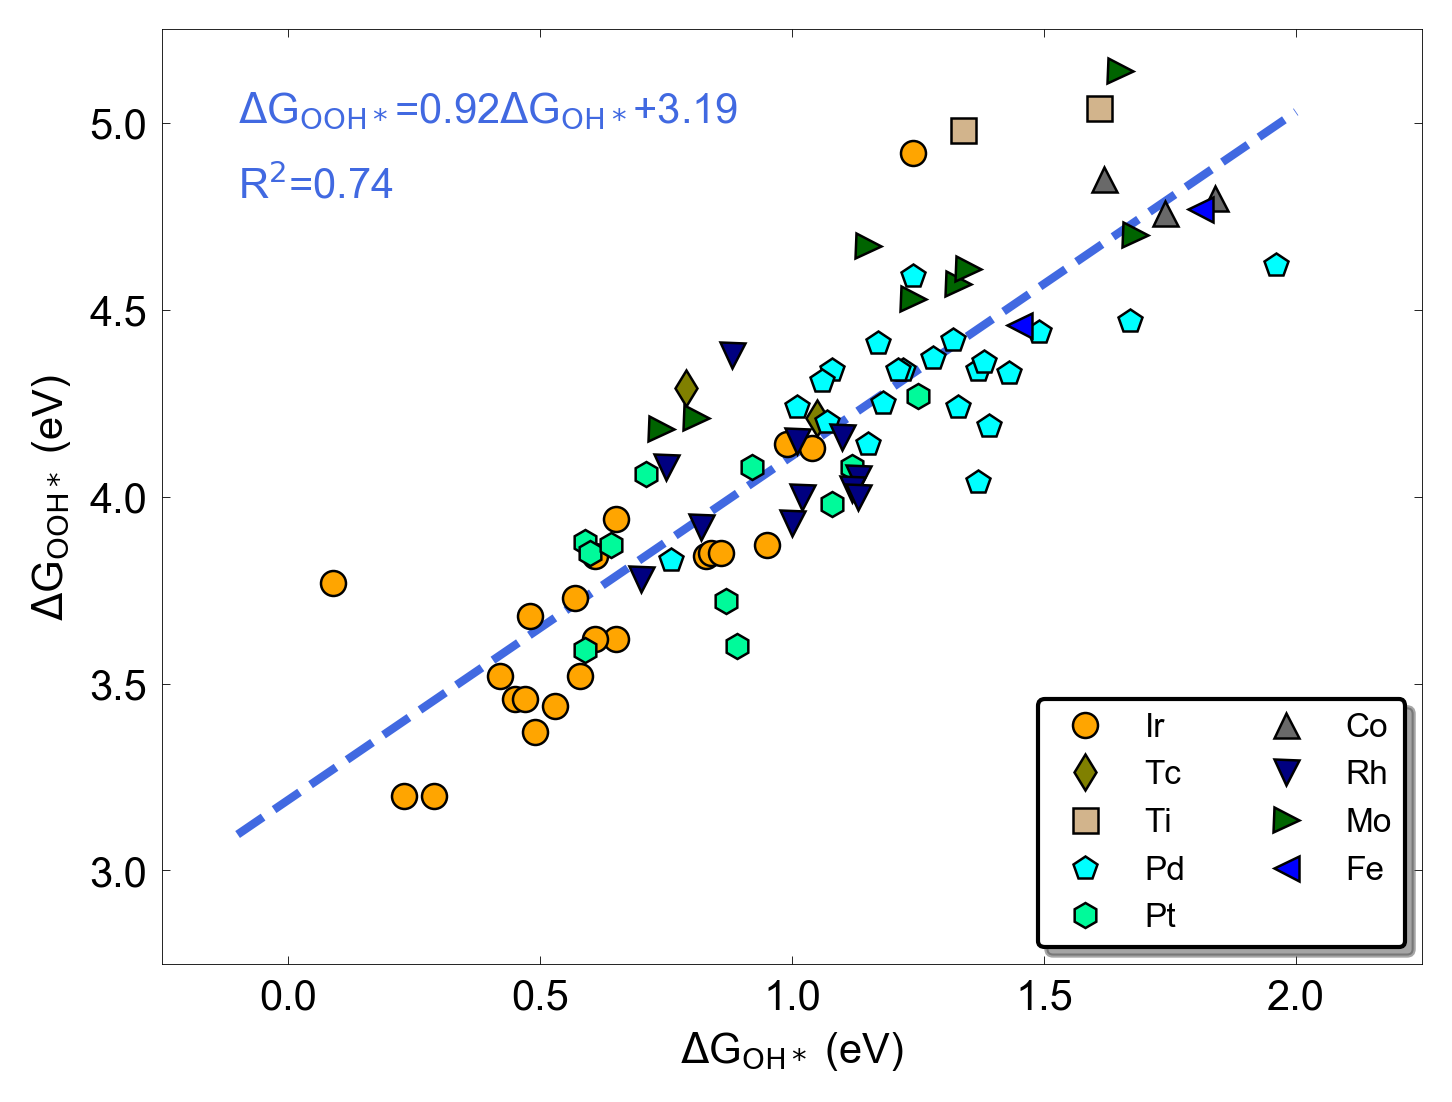

In [25]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from math import pow
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.ticker import *
from scipy import stats
import subprocess
import pandas as pd


#Import plot_settings as ps
from matplotlib import rc
fig_width_pt = 5
#inches_per_pt = 1.0/300               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt  # width in inches
fig_height = fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]
fig = plt.figure(figsize=fig_size,dpi=100)

#Import plot_settings as ps
from matplotlib import rc
fig_width_pt = 7
#inches_per_pt = 1.0/300               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt  # width in inches
fig_height = fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height*1.2]
fig = plt.figure(figsize=fig_size,dpi=300)

font_size = 25
tick_font_size = 8
#matplotlib.rcParams['ps.usedistiller'] = 'xpdf'


matplotlib.rcParams['font.size'] = 2*font_size
matplotlib.rcParams['axes.labelsize'] = 2*font_size
matplotlib.rcParams['axes.labelsize'] = font_size
matplotlib.rcParams['legend.fontsize'] = font_size
matplotlib.rcParams['xtick.labelsize'] = tick_font_size
matplotlib.rcParams['ytick.labelsize'] = tick_font_size

font_default='helvetica'
#font_default='cmss'


matplotlib.rcParams['lines.linewidth'] = 5
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.direction'] = 'in'
ax = fig.add_axes([0.2, 0.2, 0.6, 0.6])
x1=-0.25
x2=2.25
#ax.axis([x1, x2, 2.5, 4.75])
ax.set_xlim([-0.25,2.25])
ax.set_ylim([2.75, 5.25])

plt.xticks(arange(0.0,2.5,0.5), fontsize=4)
plt.yticks(arange(3,5.5,0.5), fontsize=4)

ax.set_xlabel(r'$\Delta$G$_{\sf OH*}$ (eV)', labelpad=3, fontsize=10)
#ax.set_ylabel(r'$\Delta$G$_{\sf OOH*}$, $\Delta$G$_{\sf O*}$ (eV)', labelpad=4, fontsize=6)
ax.set_ylabel(r'$\Delta$G$_{\sf OOH*}$ (eV)', labelpad=4, fontsize=10)
plt.tick_params(axis='both', length=2, width=0.2, labelsize=10, top=True, right=True)



# GOH vs GO
fit1 = np.polyfit(G_OH,G_O,1)
print(fit1)
a1=fit1[0] # slope
b1=fit1[1]

# GOH vs GOOH
fit2 = polyfit(G_OH,G_OOH,1)
print(fit2)
a2=fit2[0]
b2=fit2[1]

#Scaling Line ####################################################################
plt.plot([-0.1,2.0],[a2*(-0.1)+b2,a2*2.0+b2], ls='--', color='royalblue', lw=2)
#plt.plot([-0.1,1.6],[a1*(-0.1)+b1,a1*1.6+b1], ls='--', color='magenta', lw=2)


#Data#####################################################################

# OH vs. O
# plt.plot(Ir['G(OH)'].tolist(), Ir['G(O)'].tolist(), marker='o', markersize=6, markerfacecolor='orange', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Ir')
# plt.plot(Tc['G(OH)'].tolist(), Tc['G(O)'].tolist(), marker='d', markersize=6, markerfacecolor='olive', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Tc')
# plt.plot(Ti['G(OH)'].tolist(), Ti['G(O)'].tolist(), marker='s', markersize=6, markerfacecolor='tan', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Ti')
# plt.plot(Pd['G(OH)'].tolist(), Pd['G(O)'].tolist(), marker='p', markersize=6, markerfacecolor='cyan', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Pd')
# plt.plot(Pt['G(OH)'].tolist(), Pt['G(O)'].tolist(), marker='h', markersize=6, markerfacecolor='mediumspringgreen', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Pt')
# plt.plot(Co['G(OH)'].tolist(), Co['G(O)'].tolist(), marker='^', markersize=6, markerfacecolor='dimgray', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Co')
# plt.plot(Rh['G(OH)'].tolist(), Rh['G(O)'].tolist(), marker='v', markersize=6, markerfacecolor='navy', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Rh')
# plt.plot(Mo['G(OH)'].tolist(), Mo['G(O)'].tolist(), marker='>', markersize=6, markerfacecolor='darkgreen', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Mo')
# plt.plot(Fe['G(OH)'].tolist(), Fe['G(O)'].tolist(), marker='<', markersize=6, markerfacecolor='blue', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Fe')


# OH vs. OOH
plt.plot(Ir['G(OH)'].tolist(), Ir['G(OOH)'].tolist(), marker='o', markersize=6, markerfacecolor='orange', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Ir')
plt.plot(Tc['G(OH)'].tolist(), Tc['G(OOH)'].tolist(), marker='d', markersize=6, markerfacecolor='olive', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Tc')
plt.plot(Ti['G(OH)'].tolist(), Ti['G(OOH)'].tolist(), marker='s', markersize=6, markerfacecolor='tan', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Ti')
plt.plot(Pd['G(OH)'].tolist(), Pd['G(OOH)'].tolist(), marker='p', markersize=6, markerfacecolor='cyan', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Pd')
plt.plot(Pt['G(OH)'].tolist(), Pt['G(OOH)'].tolist(), marker='h', markersize=6, markerfacecolor='mediumspringgreen', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Pt')
plt.plot(Co['G(OH)'].tolist(), Co['G(OOH)'].tolist(), marker='^', markersize=6, markerfacecolor='dimgray', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Co')
plt.plot(Rh['G(OH)'].tolist(), Rh['G(OOH)'].tolist(), marker='v', markersize=6, markerfacecolor='navy', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Rh')
plt.plot(Mo['G(OH)'].tolist(), Mo['G(OOH)'].tolist(), marker='>', markersize=6, markerfacecolor='darkgreen', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Mo')
plt.plot(Fe['G(OH)'].tolist(), Fe['G(OOH)'].tolist(), marker='<', markersize=6, markerfacecolor='blue', color='none', markeredgewidth=0.6, markeredgecolor='k', label='Fe')






##########################################################################

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(G_OH, G_OOH)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(G_OH, G_O)

print(slope1, intercept1, r_value1, p_value1, std_err1)
print(slope2, intercept2, r_value2, p_value2, std_err2)


#G_OH vs G_OOH
eq1=r'$\Delta$G$_{\sf OOH*}$=%.2f$\Delta$G$_{\sf OH*}$+%.2f' %(a2,b2,)
ax.text(-.1,5,eq1,fontsize=10,color='royalblue')
ax.text(-.1,4.8, r'R$^{\sf 2}$=%.2f' %(r_value1**2), fontsize=10, color='royalblue' )

#G_O vs G_OOH
# eq3=r'$\Delta$G$_{\sf O*}$=%.2f$\Delta$G$_{\sf OH*}$+%.2f' %(a1,b1)
# ax.text(-.1,2,eq3,fontsize=6,color='magenta')
# ax.text(-.1,1.8, r'R$^{\sf 2}$=%.2f' %(r_value2**2), fontsize=6, color='magenta' )

leg=ax.legend(loc='lower right',fontsize=8, ncol=2, fancybox=True, shadow=True)

frame = leg.get_frame()
frame.set_edgecolor('black')
# frame.set_linewidth(0.3)
# leg.legendHandles[0]._legmarker.set_markersize(4)
# leg.legendHandles[1]._legmarker.set_markersize(4)
# leg.legendHandles[2]._legmarker.set_markersize(4)
# leg.legendHandles[3]._legmarker.set_markersize(4)
# leg.legendHandles[4]._legmarker.set_markersize(4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.2)


fig.savefig('Scaling.svg', bbox_inches='tight')
#fig.show()

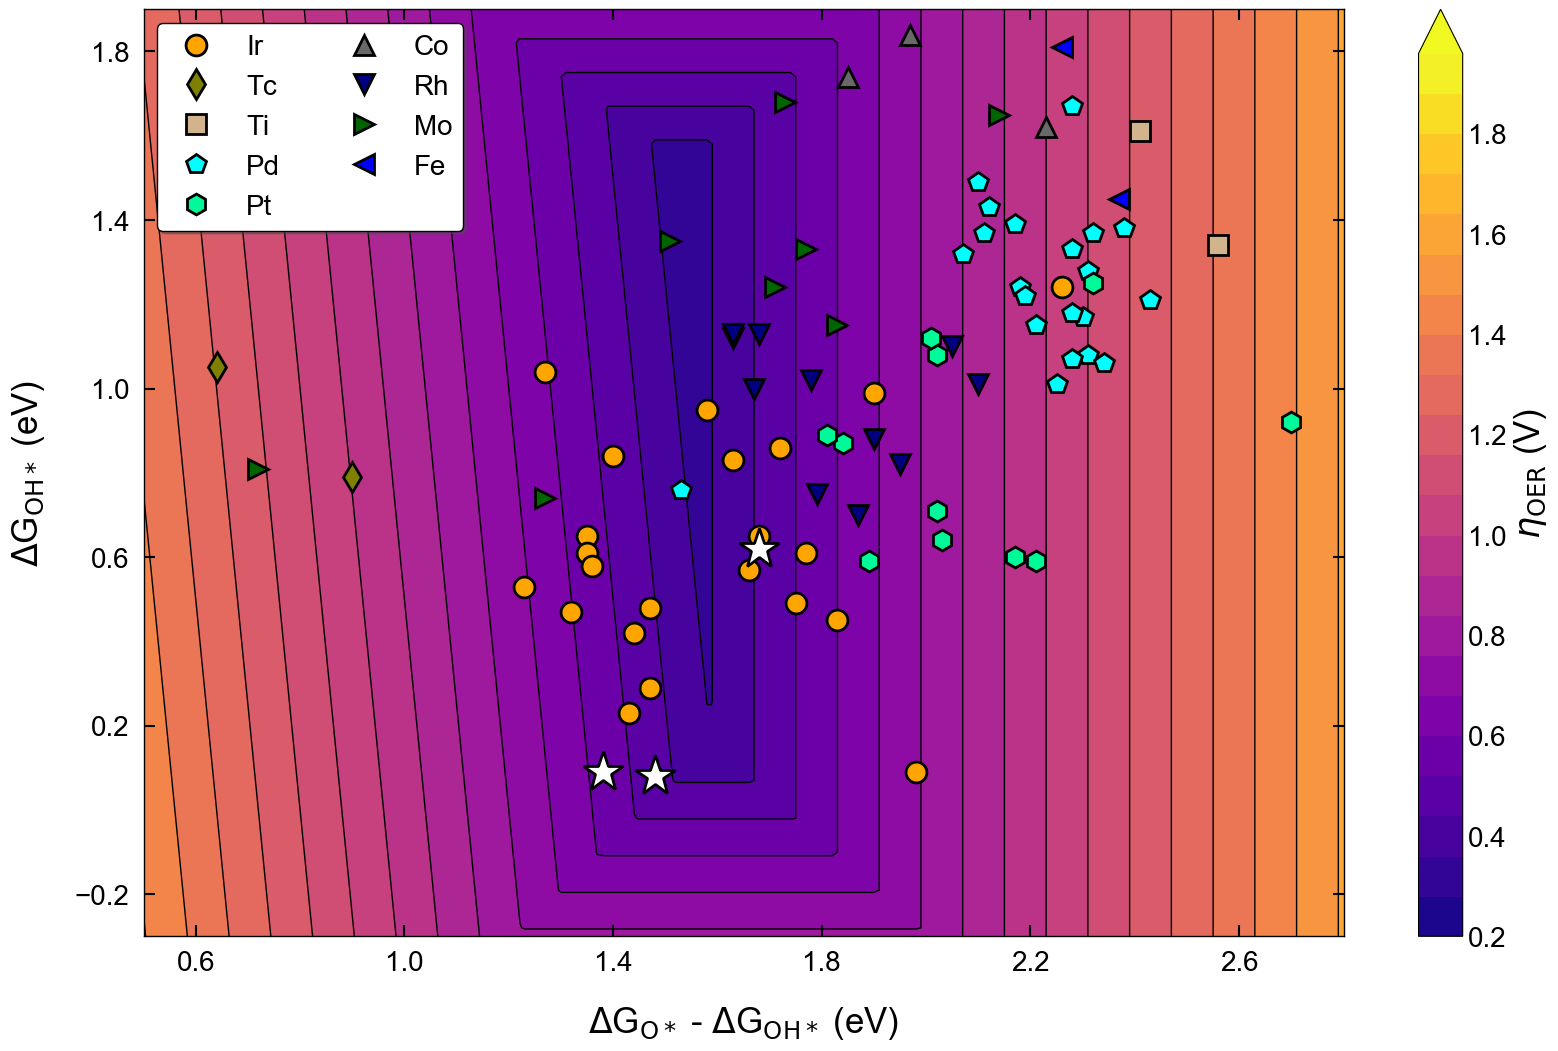

In [27]:
#! /user/bin/env python
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from math import pow
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.ticker import *
from scipy import stats
import subprocess
import pandas as pd

#Import plot_settings as ps
from matplotlib import rc
fig_width_pt = 5
#inches_per_pt = 1.0/300               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt  # width in inches
fig_height = fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]
fig = plt.figure(figsize=fig_size,dpi=100)

font_size = 25
tick_font_size = 8
xlabel_pad = 8
ylabel_pad = 18
#matplotlib.rcParams['ps.usedistiller'] = 'xpdf'

matplotlib.rcParams['font.size'] = 10
#matplotlib.rcParams['axes.labelsize'] = 2*font_size
matplotlib.rcParams['axes.labelsize'] = font_size
matplotlib.rcParams['legend.fontsize'] = font_size
matplotlib.rcParams['xtick.labelsize'] = tick_font_size
matplotlib.rcParams['ytick.labelsize'] = tick_font_size

font_default='helvetica'
#font_default='cmss'



matplotlib.rcParams['lines.linewidth'] = 5
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.direction'] = 'in'


ax = fig.add_axes([0.8, 0.0, 3,3])
ax.set_xlabel(r'$\Delta$G$_{\sf O*}$ - $\Delta$G$_{\sf OH*}$ (eV)', labelpad=20)
ax.set_ylabel(r'$\Delta$G$_{\sf OH*}$ (eV)', labelpad=20)
plt.xticks(arange(-1,3,0.4))
plt.yticks(arange(-1,3,0.4))
plt.tick_params(axis='both', length=8, width=1.5, pad=10, labelsize=20, top=True, right=True)

x1=0.0
x2=3.0
y1=-1.0
y2=3.0


delta = 0.01
x = np.arange(x1,x2+delta, delta)
y = np.arange(y1,y2+delta, delta)
X, Y = np.meshgrid(x, y)


def ooh_oh_scaling(doh):
    dooh=0.92*doh + 3.19
    return dooh

def overpotential(x,doh): # Use this to generate background
    dooh=ooh_oh_scaling(doh)
    dg14=[doh, x, dooh-(x+doh), -dooh+4.92]
    m=max(dg14)
    return m-1.23
    #return doh*do

def overpotential_label(doh,do):
    dooh=ooh_oh_scaling(doh)
    dg14=[doh, do-doh, dooh-do, -dooh+4.92]
    m=max(dg14)
    for i in range(len(dg14)):
       if(m==dg14[0]):
          return r'OH lim.'
       if(m==dg14[1]):
          return r'OH-O lim.'
       if(m==dg14[2]):
          return r'O-OOH lim.'
       if(m==dg14[3]):
          return r'OOH-O$_{\sf 2}$ lim.'
    #return doh*do    
def oer_step (i):
        steps=['H2O->OH*','OH*->O*', 'O*->OOH*', 'OOH*->H2O']
        return str(steps[i]) 


def overpotential_oer_full(doh,do,dooh):
    #do=1.556*doh + 0.9951 #from our scaling
    dg23=[doh,do-doh,dooh-do,4.92-dooh] #add solvation soon
    m=max(dg23)
    ##print dg14.index(m)
    #print dg14,m
    print(dg23)
    return [round(m-1.23,2),round(m,2),oer_step(dg23.index(m))]



#Z=overpotential(X,Y)

Z=[]
for j in y:
    tmp=[]
    for i in x: # X = G(*O) - G(*OH)
        tmp.append(overpotential(i,j))
    Z.append(tmp)


Z = np.array(Z)




origin='lower'
levels = np.arange(0.2, 2.0 ,0.08) # Change a spacing of map
cmap = plt.cm.plasma



CS = plt.contourf(X, Y, Z, levels, 
                cmap=cmap,
                extend='max',
                origin=origin,
                )

plt.contour(X, Y, Z, levels, 
            extend='max',
            origin=origin,
            linewidths=1, colors='k'
            )

# for c in CS.collections:
#     c.set_edgecolor("k")



# Bar
cbar = plt.colorbar(CS, ticks=[np.arange(0.2, 2.0, step=0.2)]) # Change a spacing of colorbar
cbar.ax.set_ylabel(r'$\eta_{\sf OER}$ (V)')
cbar.ax.tick_params(size=0, labelsize=20, labelcolor='black', width=0.5, colors='black')
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)



#####################  Load Data ####################################



plt.plot(np.array(Ir['G(O)'].tolist()) - np.array(Ir['G(OH)'].tolist()), Ir['G(OH)'].tolist(), marker='o', markersize=15, markerfacecolor='orange', color='none', markeredgewidth=2, markeredgecolor='k', label='Ir')
plt.plot(np.array(Tc['G(O)'].tolist()) - np.array(Tc['G(OH)'].tolist()), Tc['G(OH)'].tolist(), marker='d', markersize=15, markerfacecolor='olive', color='none', markeredgewidth=2, markeredgecolor='k', label='Tc')
plt.plot(np.array(Ti['G(O)'].tolist()) - np.array(Ti['G(OH)'].tolist()), Ti['G(OH)'].tolist(), marker='s', markersize=15, markerfacecolor='tan', color='none', markeredgewidth=2, markeredgecolor='k', label='Ti')
plt.plot(np.array(Pd['G(O)'].tolist()) - np.array(Pd['G(OH)'].tolist()), Pd['G(OH)'].tolist(), marker='p', markersize=15, markerfacecolor='cyan', color='none', markeredgewidth=2, markeredgecolor='k', label='Pd')
plt.plot(np.array(Pt['G(O)'].tolist()) - np.array(Pt['G(OH)'].tolist()), Pt['G(OH)'].tolist(), marker='h', markersize=15, markerfacecolor='mediumspringgreen', color='none', markeredgewidth=2, markeredgecolor='k', label='Pt')
plt.plot(np.array(Co['G(O)'].tolist()) - np.array(Co['G(OH)'].tolist()), Co['G(OH)'].tolist(), marker='^', markersize=15, markerfacecolor='dimgray', color='none', markeredgewidth=2, markeredgecolor='k', label='Co')
plt.plot(np.array(Rh['G(O)'].tolist()) - np.array(Rh['G(OH)'].tolist()), Rh['G(OH)'].tolist(), marker='v', markersize=15, markerfacecolor='navy', color='none', markeredgewidth=2, markeredgecolor='k', label='Rh')
plt.plot(np.array(Mo['G(O)'].tolist()) - np.array(Mo['G(OH)'].tolist()), Mo['G(OH)'].tolist(), marker='>', markersize=15, markerfacecolor='darkgreen', color='none', markeredgewidth=2, markeredgecolor='k', label='Mo')
plt.plot(np.array(Fe['G(O)'].tolist()) - np.array(Fe['G(OH)'].tolist()), Fe['G(OH)'].tolist(), marker='<', markersize=15, markerfacecolor='blue', color='none', markeredgewidth=2, markeredgecolor='k', label='Fe')



# Ir
plt.plot([1.38, 1.48, 1.68],[0.09, 0.08, 0.62], marker='*', markersize=30, markerfacecolor='white', color='none', markeredgewidth=2, markeredgecolor='k')






corners=[[1.3,1.0],[x1+(x2-x2)*0.2,y1+(y2-y1)*0.9],[x1+(x2-x2)*0.8,y1+(y2-y1)*0.1],[-2,0]]


ax.set_xlim(0.5, 2.8) # better to change at the end of the script.
ax.set_ylim(-0.3,1.9)

# ax.annotate(r'Rutile IrO$_{\sf 2}$ (110)', fontsize=25, xy=(1.38,0.09), xytext=(-100,-40), 
#             textcoords='offset points', ha='center', va='bottom',
#             bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8),
#             arrowprops=dict(arrowstyle='->', #connectionstyle='arc3,rad=0.5', 
#                             color='black'))

leg = ax.legend(loc='upper left',fontsize=20, ncol=2, fancybox=True, shadow=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)

fig.savefig('/Users/home/Desktop/OER_contour.svg', bbox_inches='tight')
#fig.show()
